In [127]:
import numpy as np
import matplotlib.pyplot as plt

Wir haben in den Referaten bereits einiges über Optimierung gehört.

Nun ist es Zeit für praktische Übungen.
Letztendlich ist Machine Learning ein großes Optimierungsproblem wo man z.B. versucht die Parameters des Netzwerks an Trainingsdaten so anzupassen, dass diese einen möglichst optimalen Output erzeugen.


# 1. Gradient Descent

Gradient Descent wird auch der Weg des steilsten Abstieges genannt.
Ein (lokales) Minimum lässt sich damit finden, indem man ähnlich wie bei einer Wanderung einfach steil bergab geht.
Die Richtung des Abstieges lässt sich mit der/dem Ableitung/Gradient bestimmen.


Gradient Descent lässt sich formal schreiben für eine Funktion $f:\mathbb{R}\mapsto \mathbb{R}$:

$$ x_{n+1} = x_n - \gamma \cdot \frac{\mathrm{d}f}{\mathrm{d}x}\bigg\vert_{x_n}$$

In Falle von mehrerer Variablen (z.B. als Vektor gespeichert), gilt für $h:\mathbb{R}^N\mapsto \mathbb{R}^N$

$$ \vec x_{n+1} = \vec x_n - \gamma \cdot (\nabla h)(\vec x_n)$$

In beiden Fällen ist $\gamma$ die Schrittweite.

In [128]:
# TODO
def gradient_descent(df, x0, N, step_size=1e-2):
    """Returns the optimum value for x

    Arguments:
    df: A function which evaluates the derivative/gradient of f
    x0: Start value
    N: number of iterations
    step_size: Step size in each iteration
    """
    for i in range(N):
        x0 = x0 - step_size * df(x0)
            
    return x0

## Beispiel 1 Gradient Descent
Implementiere nun eine Funktion und deren Ableitung. Überprüfe, ob der gradient descent Mechanismus funktioniert.

Welche Funktion eignet sich?

In [129]:
# TODO
def f(x):
    return (x-5)**2
    
# TODO
def df(x):
    return 2*(x-5)

In [130]:
gradient_descent(df, 0, 1000)

4.999999991585162

## Beispiel 2 Gradient Descent

Implementiere eine Funktion mit mehreren Variablen (z.B. $(x - 21.3) ^2 + (y + 13.1)^4$).

Geht die Implementierung von oben nun auch für den mehrdimensionalen Fall?

In [13]:
# TODO
def f_2(x):
    return (x[0] - 5)**2 + (x[1] +5)**2
    
# TODO
def df_2(x):
    return np.array([2*(x[0]-5), 2*(x[1] + 5)])

In [14]:
gradient_descent(df_2, np.array([0.0, 0.0]), 1000)

array([ 4.99999999, -4.99999999])

## Beispiel 3

Implementiere eine gradient descent Funktion, welche sowohl den Funktionswert, als auch $x_n$ in jeder Iteration speichert.
Nutze dafür ein array oder eine Liste.

In [15]:
def gradient_descent_track(f, df, x0, N, step_size=1e-2):
    log_f = []
    log = []
    for i in range(N):
        x0 = x0 - step_size * df(x0)
        log.append(x0)
        log_f.append(f_2(x0))
    return x0, log, log_f

In [16]:
x0, log, log_f = gradient_descent_track(f_2, df_2, np.array([0.0, 0.0]), 300)

## Beispiel 4

Plotte den Funktionswert über die Anzahl der Iterationen

Text(0.5, 0, 'Anzahl Iterationen')

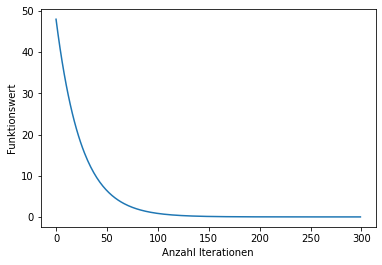

In [19]:
plt.plot(range(300), log_f)
plt.ylabel("Funktionswert")
plt.xlabel("Anzahl Iterationen")

Text(0.5, 0, 'Anzahl Iterationen')

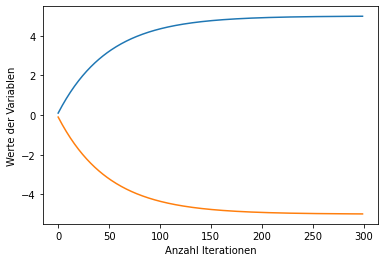

In [20]:
plt.plot(range(300), log)
plt.ylabel("Werte der Variablen")
plt.xlabel("Anzahl Iterationen")

# 2. Automatic Differentation

Bisher war es recht mühsam, da wir die Ableitung per Hand ausgerechnet haben.
Zum Glück müssen wir das bei unseren Neuronalen Netzen nicht machen, da PyTorch Mechanismen hierfür eingebaut hat (Automatic Differentation).

Wir wollen nun komplexere Funktionen optimieren, ohne den Gradient per Hand zu berechnen.

In [24]:
import torch

/home/fxw/.conda/envs/naka/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [25]:
# gegeben
def g_torch(x):
    return (x[0]-1)**2  + (torch.sqrt(x[1]) - torch.log(x[2]))**2 + x[1]**2 + (torch.log(x[1]) - 2)**2

In [136]:
def gradient_descent_track_ad(f, x0, N, step_size=1e-2):
    log_f = []
    log = []
    x = x0
    for i in range(N):
        l = f(x)
        # damit wird der gradient berechnet
        l.backward()
        df = x.grad
        # spezielles construct
        with torch.no_grad():
            # step update
            x = x - step_size * df
            # spezielles construct 
            x = torch.tensor(x, requires_grad=True)
            log.append(np.array(x))
            log_f.append(l)
            
    return x0, log, log_f

In [137]:
t_x, t_log, t_log_f = gradient_descent_track_ad(f_2, torch.tensor([1.0, 1.0], requires_grad=True), 
                                                100, 
                                                step_size=0.1)

/tmp/ipykernel_76969/2911694565.py:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x, requires_grad=True)


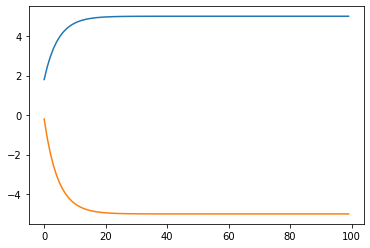

In [138]:
plt.plot(t_log)

# 3. Optimierer von PyTorch

PyTorch stellt eine ganze Reihe von verschiedenen Optimierern zur Verfügung.
`ADAM` wird relativ häufig benutzt.

Teste nun verschiedene Arten von Optimierern. Versuche auch eine graphische Darstellung zu machen, in denen du verschiedene Optimierer miteinander hinsichtlich Konvergenz und Startbedingungen vergleichst.

In [43]:
def ADAM_track_ad(f, x0, N, step_size=1e-2):
    log_f = []
    log = []
    x = x0
    optimizer = torch.optim.Adam([x], lr=0.1)
    for i in range(N):
        optimizer.zero_grad()
        l = f(x)
        l.backward()
        optimizer.step()
        with torch.no_grad():
            log.append(np.array(x))
            log_f.append(l)
            
    return x, log, log_f

In [139]:
# definiere die Funktion nun so, dass ein bestimmter optimierer über das keyword argument
# optimizer übergeben werden kann
def torch_optimize(f, x0, N, optimizer=torch.optim.SGD, lr=1e-2):
    log_f = []
    log = []
    x = x0
    optimizer = optimizer([x], lr=lr)
    for i in range(N):
        optimizer.zero_grad()
        l = f(x)
        l.backward()
        optimizer.step()
        with torch.no_grad():
            log.append(np.array(x))
            log_f.append(l)
            
    return x, log, log_f

In [140]:
t_x, t_log, t_log_f = ADAM_track_ad(f_2, torch.tensor([0.0, 0.0], requires_grad=True), 100)

In [151]:
t_x2, t_log2, t_log_f2 = torch_optimize(f_2, torch.tensor([0.0, 0.0], requires_grad=True), 1000,\
                                        optimizer=torch.optim.Adadelta, lr=1)

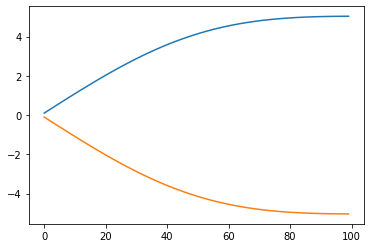

In [152]:
plt.plot(t_log)

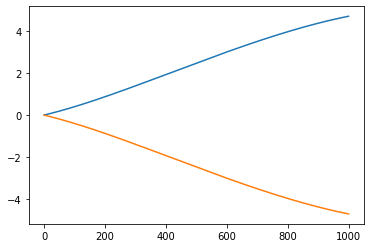

In [153]:
plt.plot(t_log2)

# 4. Rosenbrock Funktion

Mache auch die gleichen Vergleiche auch mit der Rosenbrock Funktion.

In [154]:
def rosenbrock(x):
    return (1.0 - x[0])**2 + 100.0 * (x[1] - x[0]**2)**2

In [171]:
t_x_2, t_log_2, t_log_f_2 = torch_optimize(rosenbrock, torch.tensor([0.0, 0.0], requires_grad=True), 500,  lr=0.001)

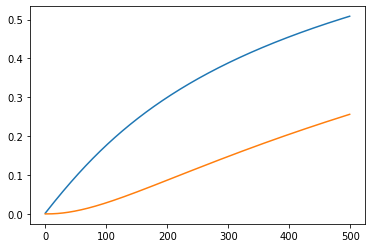

In [172]:
plt.plot(t_log_2)

# 5. Weitere Funktionen

Auf Wikipedia findet man eine Reihe ganz verschiedener Funktionen.

Versuche ein paar davon zu optimieren!

https://en.wikipedia.org/wiki/Test_functions_for_optimization

In [173]:
def rastrigin(x):
    return 20 + (x[0]**2 - 10 * torch.cos(2 * torch.pi * x[0])) +\
    (x[1]**2 - 10 * torch.cos(2 * torch.pi * x[1]))

In [174]:
t_x, t_log, t_log_f = torch_optimize(rastrigin, torch.tensor([0.2, 0.2], requires_grad=True), 5000, lr =0.01,\
                                     optimizer=torch.optim.Adadelta)

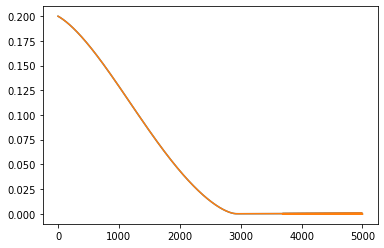

In [175]:
plt.plot(t_log)